## Prosper Loan Exploratory Data Analysis
### by Mugdha Kamat

### Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan,  including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit  history, and the latest payment information. Detail information of all the variables in this dataset can be found [here.](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [23]:
# Set the grid for the output coulmns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Let us load the dataset into pandas dataframe and perform some initial wrangling

In [24]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('M:/Udacity/prosperLoanData.csv')

In [25]:
# Explore the dimensions of dataframe 
loan_df.shape

(113937, 81)

In [5]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [26]:
#display the first few rows
loan_df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,10/11/2001 0:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,9/12/2007 0:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2/27/2014 8:28,680.0,699.0,3/18/1996 0:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,3/3/2014 0:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,7/27/2002 0:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,1/17/2007 0:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,10/22/2012 11:02,800.0,819.0,2/28/1983 0:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,11/1/2012 0:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,9/14/2013 18:38,680.0,699.0,2/20/2004 0:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A18036930218888920068

In [27]:
#descriptive statistics

loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [28]:
# check for duplicates in the dataset
sum(loan_df.duplicated())

0

In [9]:
# Getting the number of missing values in each column
missing_val = loan_df.isna().sum()

# Excluding columns that contains 0 missing values
missing_val = missing_val[missing_val > 0]
print(missing_val)

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

It can be observed that there are a lot of nulls for most of the variables in the dataset. As I am interested in investigating just a handful of the features from this dataset, I will subset the dataframe to extract the features of interest for my analysis.The nulls will be removed from this subset.

In [29]:
# extract the features of interest 
sub_data =  [
    'Term', 'LoanStatus', 'BorrowerState','BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'EmploymentStatusDuration','StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','DebtToIncomeRatio'
]

# adjust the datframe
loan_subdata = loan_df[sub_data]

In [30]:
# explore few rows of the sub dataframe
loan_subdata.head(5)

,Term,LoanStatus,BorrowerState,BorrowerRate,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,EmploymentStatusDuration,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors,DebtToIncomeRatio
0,36,Completed,CO,0.1580,0.16516,NaN,0,Self-employed,4.0,2.0,3083.333333,NaN,9425,9/12/2007 0:00,0,258,0.17
1,36,Current,CO,0.0920,0.12016,A,2,Employed,0.0,44.0,6125.000000,NaN,10000,3/3/2014 0:00,0,1,0.18
2,36,Completed,GA,0.2750,0.28269,NaN,0,Not available,0.0,NaN,2083.333333,NaN,3001,1/17/2007 0:00,0,41,0.06
3,36,Current,GA,0.0974,0.12528,A,16,Employed,14.0,113.0,2875.000000,NaN,10000,11/1/2012 0:00,0,158,0.15
4,36,Current,MN,0.2085,0.24614,D,2,Employed,0.0,44.0,9583.333333,1.0,15000,9/20/2013 0:00,0,20,0.26


In [31]:
# Check the dimension of the sub data
loan_subdata.shape

(113937, 17)

In [13]:
#check number of null values for the subset data 
missing_values = loan_subdata.isnull().sum()

# sort the data 
missing_values.sort_values(ascending=False)

TotalProsperLoans            91852
ProsperRating (Alpha)        29084
DebtToIncomeRatio             8554
EmploymentStatusDuration      7625
BorrowerState                 5515
EmploymentStatus              2255
DelinquenciesLast7Years        990
BorrowerAPR                     25
StatedMonthlyIncome              0
Investors                        0
LoanOriginalAmount               0
ListingCategory (numeric)        0
LoanOriginationDate              0
BorrowerRate                     0
Recommendations                  0
LoanStatus                       0
Term                             0
dtype: int64

There are a lot of missing values in ProsperRating (Alpha) column as Prosper Rating has been used only since 2009. So, we will drop these missing values.

In [32]:
# dropping the Nulls from 'ProsperRating (Alpha)'
loan_subdata = loan_subdata.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Now, let's convert LoanOriginationDate to datetime datatype.

In [33]:
# Changing the data type of 'LoanOriginationDate' to datetime
loan_subdata['LoanOriginationDate'] = pd.to_datetime(loan_subdata['LoanOriginationDate'])

In [34]:
# Let's check if there are any nulls left
loan_subdata.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            65056
DebtToIncomeRatio             7296
EmploymentStatusDuration        19
ListingCategory (numeric)        0
Term                             0
LoanStatus                       0
BorrowerState                    0
BorrowerRate                     0
BorrowerAPR                      0
ProsperRating (Alpha)            0
EmploymentStatus                 0
Investors                        0
DelinquenciesLast7Years          0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
index                            0
dtype: int64

In [35]:
loan_subdata['DebtToIncomeRatio'].mean()

0.25875188570986324

TotalProsperLoans value will be null if the borrower had no prior loans and DebtToIncomeRatio value is Null if the debt to income ratio is not available.So, lets replace TotalProsperLoans missing values with 0 and DebtToIncomeRatio missing values with the mean 0.25. Let's also replace EmploymentStatusDuration missing values with 0.

In [36]:
# Replace 'TotalProsperLoans' Nulls with 0
loan_subdata['TotalProsperLoans'] = loan_subdata['TotalProsperLoans'].fillna(0)
loan_subdata['DebtToIncomeRatio'] = loan_subdata['DebtToIncomeRatio'].fillna(0.25)
loan_subdata['EmploymentStatusDuration'] = loan_subdata['EmploymentStatusDuration'].fillna(0)

In [37]:
# confirm that there's no Nulls left for the sub dataset
loan_subdata.isna().values.sum()

0

In [38]:
loan_subdata.shape

(84853, 18)

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features.Most variables are numeric however there are some categorical variables too.
<li>Borrower State - categorical variable
<li>LoanStatus - categorical variable
<li>ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')
<li>EmploymentStatus - categorical variable
<li>ListingCategory (numeric) - a numeric code for category of credit (will explored in detail below).
<li>LoanOriginationDate - datetime object
    
<br>The dataset features can be split into two main categories:
<li>Borrower information
<li>Loan performance information

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out factors affecting a loan’s outcome status. I would also like to analyze the borrower characteristics and what features are best for predicting the default on credit.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The borrowers Prosper rating will have major impact on chances of default. Prosper rating will depend on stated income and employment status. For understanding borrower characteristics, borrower information such as EmploymentStatus, EmploymentStatusDuration, BorrowerState, StatedMonthlyIncome and  DebtToIncomeRatio has been included.

### Univariate Exploration

Let's look at the distributions, frequencies and key statistics of variables one at a time.

In [39]:
# setting color
default_color = sns.color_palette()[4]

### Borrower Characteristics 

Let us focus on the borrowers and see who is using the platform and why are they using it

Let us start by looking at state wise loans.

In [40]:
loan_subdata['BorrowerState'].value_counts().head(5)

CA    10761
NY     5844
TX     5634
FL     5406
IL     4264
Name: BorrowerState, dtype: int64

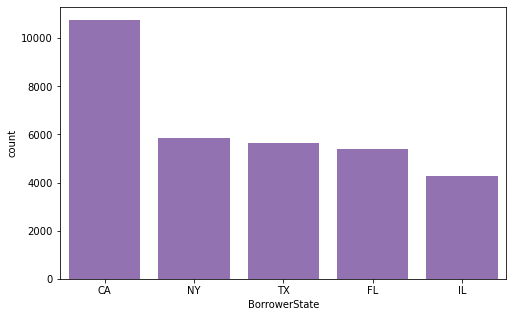

In [41]:
plt.figure(figsize = [8,5])
sns.countplot(data=loan_subdata, x='BorrowerState', color=default_color, order=loan_subdata.BorrowerState.value_counts().iloc[:5].index);

The visualization above clearly shows that most borrowers on Prosper come from California. This is not surprising as Prosper is a San Francisco, CA based company and home of Silicon Valley. 
<br>Now, let's check the employment status.

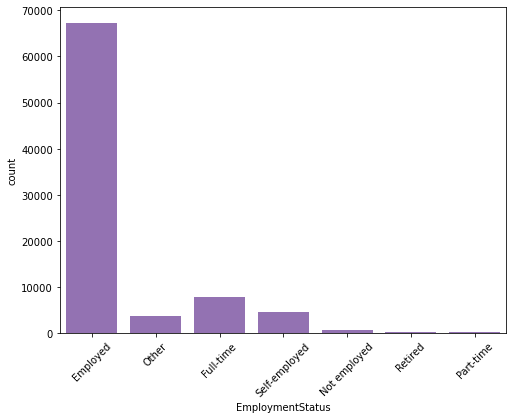

In [42]:
plt.figure(figsize = [8,6])
sns.countplot(data=loan_subdata, x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45);

The majority of borrowers are Employed all other categories constitute only a small portion of the borrowers.

 Next let's take a look at EmploymentStatusDuration.

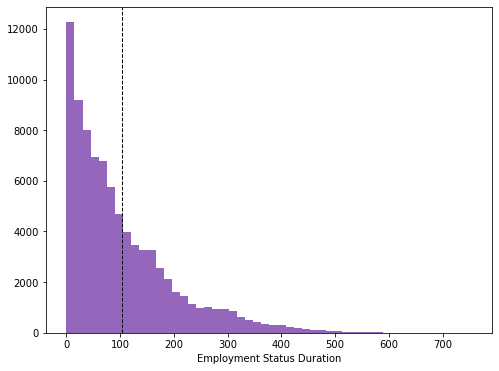

In [43]:
plt.figure(figsize = [8,6])
plt.hist(data=loan_subdata, x='EmploymentStatusDuration', bins=50, color=default_color)
plt.axvline(loan_subdata['EmploymentStatusDuration'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Employment Status Duration');

The histograms above reveal further insights about the borrowers on Prosper. The average EmploymentStatusDuration is about 8 years(100 months) and almost all borrowers indicate a number between 0 and 200 months. Surprisingly, there are also a few borrowers that have been in the same status for more than 500 months (~40 years).

In [44]:
loan_subdata.DelinquenciesLast7Years.describe()

count    84853.000000
mean         3.659435
std          9.347957
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         99.000000
Name: DelinquenciesLast7Years, dtype: float64

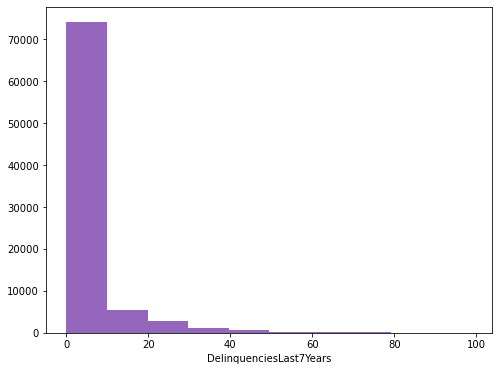

In [45]:
plt.figure(figsize = [8,6])
plt.hist(data=loan_subdata, x='DelinquenciesLast7Years', bins=10, color=default_color)
plt.xlabel('DelinquenciesLast7Years');

Most of the Prosper clients have 0 delinquencies for the last 7 years, a small group has up to 20 delinquencies. Also, very few have more than 20 but less than 100 delinquencies.

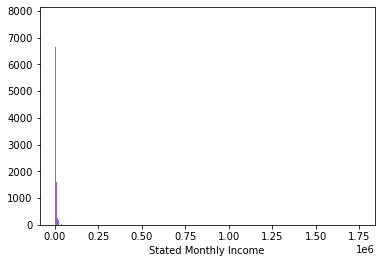

In [46]:
binsize = 500
bins = np.arange(0, loan_subdata['StatedMonthlyIncome'].max()+binsize, binsize)
plt.hist(data=loan_subdata, x='StatedMonthlyIncome', bins=bins, color=default_color)
plt.xlabel('Stated Monthly Income');


Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [47]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan_subdata['StatedMonthlyIncome'].std()
income_mean = loan_subdata['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan_subdata[loan_subdata['StatedMonthlyIncome'] >= boundary])

245

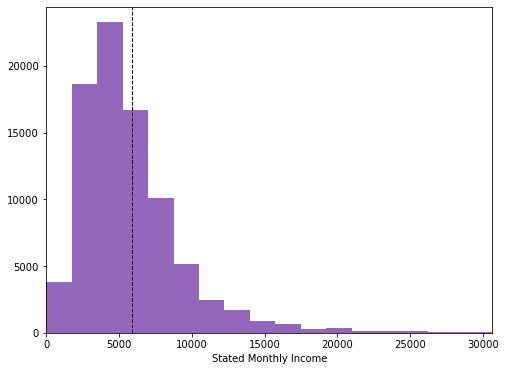

In [48]:
# This time limit x scale by boundary
plt.figure(figsize = [8,6])
plt.hist(data=loan_subdata, x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary)
plt.axvline(loan_subdata['StatedMonthlyIncome'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Stated Monthly Income');

Moreover, the average StatedMonthlyIncome is slightly above 5,000 USD, which is quite high. The histogram shows a majority of borrowers actually have a monthly income below 5,000 USD. The x-Axis has been limited as some borrowers indicated a monthly income of more than 25.000 USD which were mostly outliers.
<br>Now, let's check DebtToIncomeRatio.

In [49]:
loan_subdata.DebtToIncomeRatio.describe()

count    84853.000000
mean         0.257999
std          0.304343
min          0.000000
25%          0.160000
50%          0.240000
75%          0.310000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

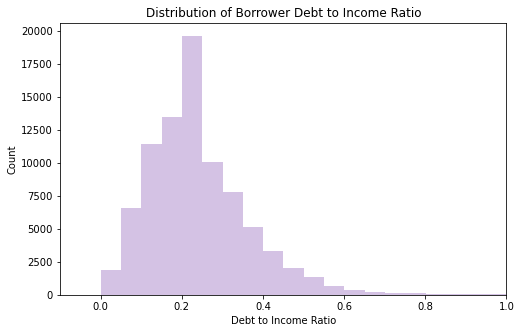

In [50]:
# distribution plot
plt.figure(figsize = [8,5])
sns.distplot(loan_subdata.DebtToIncomeRatio, kde = False ,bins = 200 , color = default_color)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

It appears that most borrowers who apply for a loan have a debt to income ratio around 20%. 

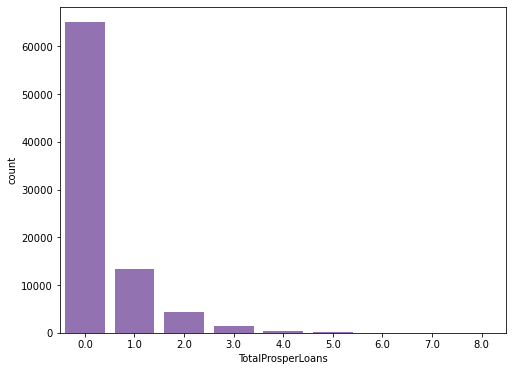

In [51]:
plt.figure(figsize = [8,6])
sns.countplot(data=loan_subdata, x='TotalProsperLoans', color=default_color);

The high number of unavailabe TotalProsperLoans indicates that most borrowers on Prosper are using the platform for the first time. We will assume that the unavailable data indicates no previous loans with Prosper. However, some borrowers have used the platform before.

### Loan characteristics on Prosper

In the following section I decided to have a closer look at the loans funded by the Prosper community.

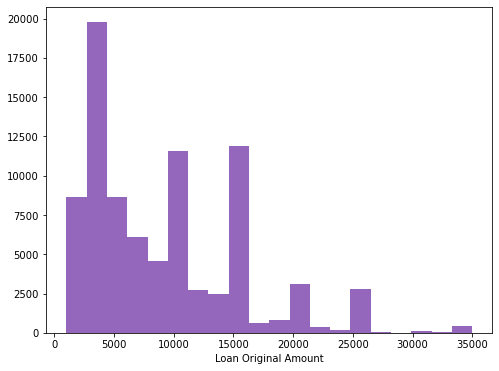

In [52]:
plt.figure(figsize = [8,6])
plt.hist(data=loan_subdata, x='LoanOriginalAmount', bins=20, color=default_color)
plt.xlabel('Loan Original Amount');

The LoanOriginalAmount plot indicates that borrowers usually ask for an amount less than 15.000 USD, even though there are also loans with much higher amounts. Especially 5,000, 10,000 and 15,000 USD loans are very popular on Prosper.
<br>Let's move on to LoanOriginationDate.

In [53]:
loan_subdata['LoanOriginationDate'].describe()

count                   84853
unique                   1165
top       2014-01-22 00:00:00
freq                      491
first     2009-07-20 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

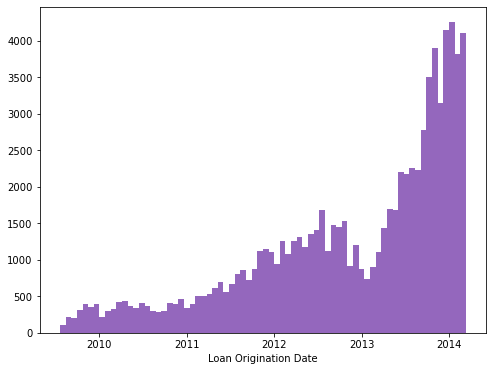

In [308]:
plt.figure(figsize = [8,6])
plt.hist(data=loan_subdata, x='LoanOriginationDate', bins=72, color=default_color)
plt.xlabel('Loan Origination Date');

Data points are form 2009-07-20 till 2014-02-21. We can clearly see a substansial growth for the number of loans from the start of 2013.

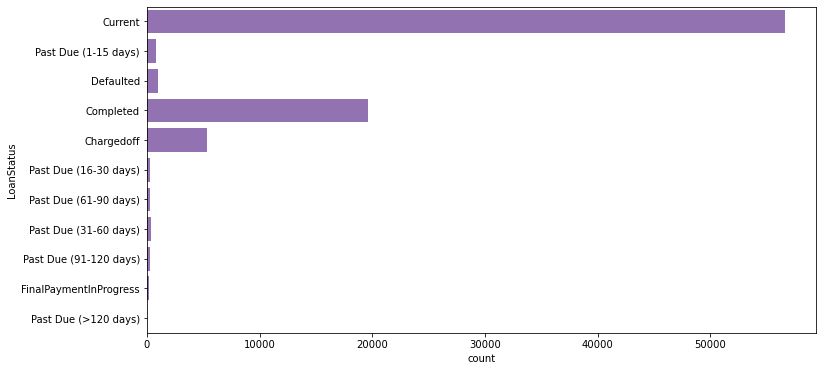

In [54]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=0)
sns.countplot(data = loan_subdata, y = 'LoanStatus', color = default_color);

We can observe that for loan status, most loans in the data set are either completed or currently being paid back. 

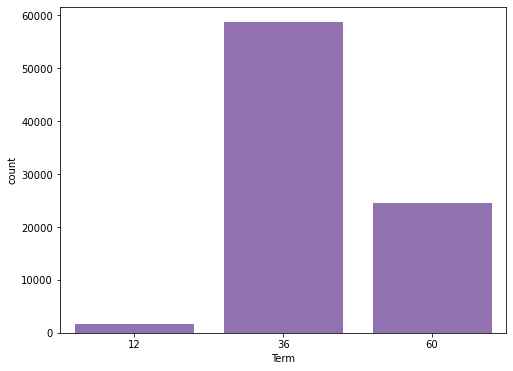

In [55]:
# Visulizing the time periods for loans
plt.figure(figsize=[8, 6])
sns.countplot(data = loan_subdata, x = 'Term', color = default_color);

For Term, the loans time periods, there are three options: 36, 60 and 12 months.Again, the most popular term for the loans among the borrowers in this dataset is 36 months. 
<br>Now, let's look at BorrowerAPR and BorrowerRate

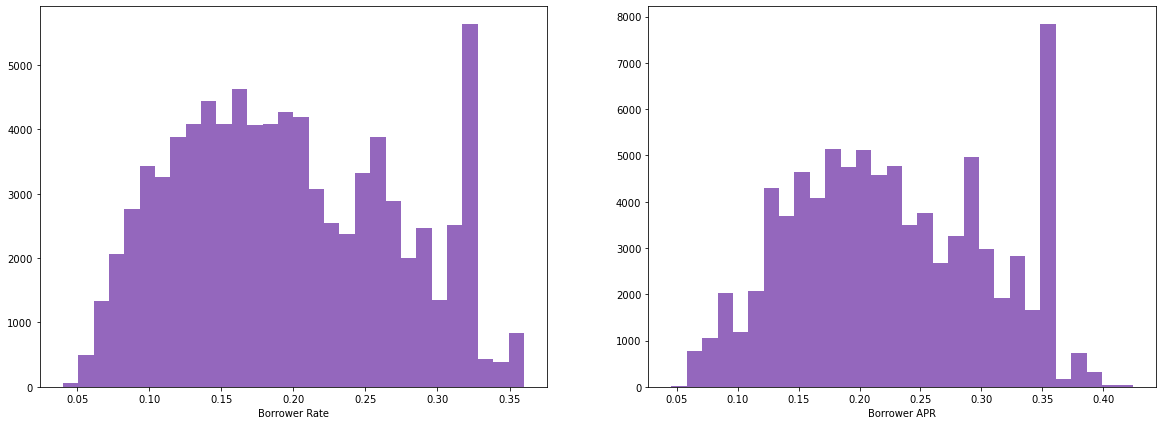

In [56]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 7]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
plt.hist(data = loan_subdata, x = 'BorrowerRate', bins = 30, color = default_color);
plt.xlabel('Borrower Rate');
# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(data = loan_subdata, x = 'BorrowerAPR', bins = 30, color = default_color)
plt.xlabel('Borrower APR');

According to above definitions by Bank of America,  the distribution of BorrowerAPR and BorrowerRate should be similar with  slight difference since the APR is always higher than the interest rate.
The distibution for Borrower Rate is roughly normal, except couple of peaks on right side of mean.Let's check those peaks.

In [57]:
# Check the frequency of the top 2 peaks
loan_subdata.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

Turns out two most common rates are 0.3177 and 0.3199. 
<br>Let's check ProsperRating (Alpha) next. But ProsperRating (Alpha) is ordinal categorial variable (From the highest rating A to the lowest HR) so, we need to convert it using pandas:

In [59]:
#converting prosper rating to categorical data type
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
loan_subdata['ProsperRating (Alpha)'] = loan_subdata['ProsperRating (Alpha)'].astype(ordered_var)

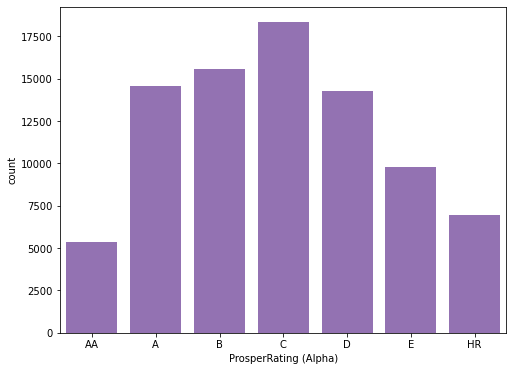

In [314]:
plt.figure(figsize = [8, 6])
sns.countplot(data=loan_subdata, x='ProsperRating (Alpha)', color=default_color);

Interestingly ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through ListingCategory (numeric):

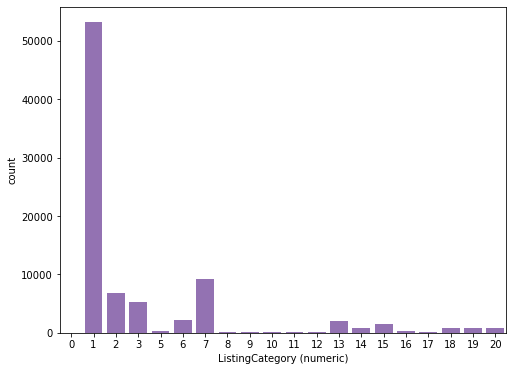

In [60]:
plt.figure(figsize = [8, 6])
sns.countplot(data=loan_subdata, x='ListingCategory (numeric)', color=default_color);

The category of the listing that the borrower selected when posting their listing:
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The most popular services offered by  Prosper are Debt Consolidation, Home Improvement, and Business.

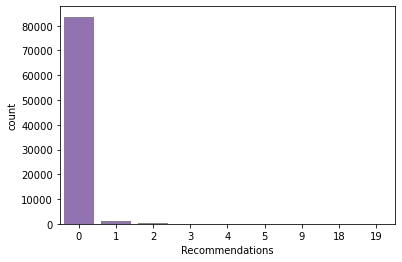

In [61]:
sns.countplot(data=loan_subdata, x='Recommendations', color=default_color);

The vast majority of loans are availed without recomendations. Next let's check the Investors.

In [62]:
loan_subdata.Investors.describe()

count    84853.000000
mean        68.264669
std         95.195831
min          1.000000
25%          1.000000
50%         32.000000
75%         97.000000
max       1189.000000
Name: Investors, dtype: float64

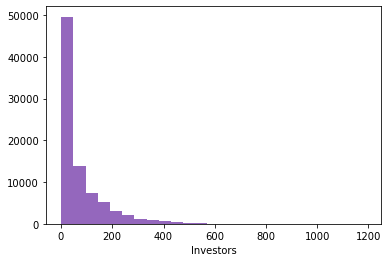

In [63]:
plt.hist(data=loan_subdata, x='Investors', bins=25, color=default_color)
plt.xlabel('Investors');

Most loans have only one investor and majority less than 200 investors but some have about 1200 investors.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Distribution of monthly stated income is very unusual has a lot of outliers and a very large range, because this is evidently based on borrowers' self-reporting. Prosper ratings are almost normally distributed. I did not perform any scale transformations here. Most loans are below 15,000, it seems like most loans are increments of 5,000.Prosper ratings are almost normally distributed.
DelinquenciesLast7Years and TotalProsperLoans are highly skewed and have unusual distributions. This is the case because most loans in the data set have either no data recorded or a value of 0. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The dataset was cleaned as it had a lot missing values. Mostly,the loans are current loans. As our objective is to define driving factors of outcome of loan, we are not interested in any current loans (and loans with a specified past due period). Also chargedoff loans can be considered as defaulted. We will make some modifications to the data in the next step:

In [64]:
# Check the number of each value in the 'LoanStatus'
loan_subdata['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [65]:
# leaving only completed chargedoff or defaulted listings
condition = (loan_subdata['LoanStatus'] == 'Completed') | (loan_subdata['LoanStatus'] == 'Defaulted') | (loan_subdata['LoanStatus'] == 'Chargedoff')
loan_subdata = loan_subdata[condition]

In [66]:
# setting chargedoff as defaulted
def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

In [67]:
loan_subdata['LoanStatus'] = loan_subdata.apply(change_to_defaulted, axis=1)

In [68]:
#Check the values counts again
loan_subdata['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

After modifying LoanStatus, we now have 19664 Completed loans and 6341 Defaulted.
<br>We also need to remove the outliers from StatedMonthlyIncome, we can presume that this is self-reporting parameter and the outliers are simply errors made by borrowers most likely monthly income is mistaken for annual income.

In [69]:
# eliminate the outliers
loan_subdata = loan_subdata[loan_subdata['StatedMonthlyIncome'] < boundary]

In [70]:
len(loan_subdata[loan_subdata['StatedMonthlyIncome'] >= boundary])

0

ListingCategory (numeric) is a numeric variable according to the dataset and has less count for most of the categories making it difficult to visualize.So, let us reduce the categories and make the variable categorical.

In [71]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

In [72]:
loan_subdata['ListingCategory (numeric)'] = loan_subdata.apply(reduce_categories, axis=1)

In [73]:
loan_subdata['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12713
Other                  7070
Home Improvement       2600
Business               2351
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

### Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [74]:
numeric_vars = ['BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)',
    'DelinquenciesLast7Years','StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','DebtToIncomeRatio']

categoric_vars = ['Term','LoanStatus','BorrowerState','ListingCategory (numeric)','EmploymentStatus']

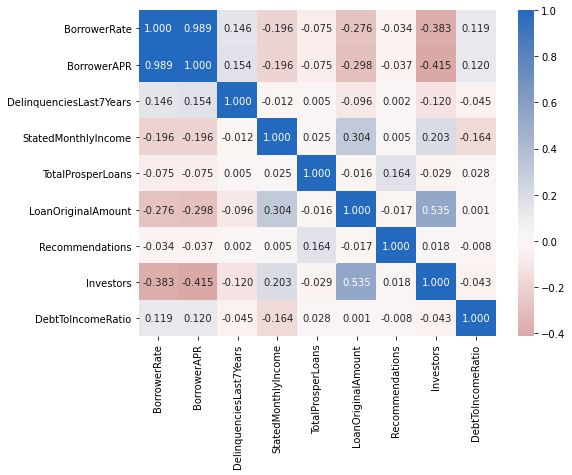

In [75]:
# correlation plot
plt.figure(figsize = [8, 6])
sns.heatmap(loan_subdata[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It is interesting to note that there is no strong correlation between most variables in this dataset except Borrower Rate and Borrower APR.
There is some moderate positive correlation between LoanOriginalAmount and number of Investors, LoanOriginalAmount and StatedMonthlyIncome.
There is also a moderate negative correlation between number of investors and borrower rate.

Let's move to the categorical features:

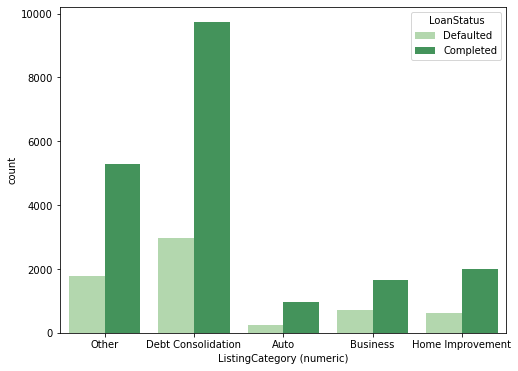

In [76]:
plt.figure(figsize = [8,6])
sns.countplot(data=loan_subdata, x='ListingCategory (numeric)', hue='LoanStatus', palette='Greens');

Visually we can see that proportion of defaulted loans is higer for business and home improvement category than for other or debt consolidation category. 

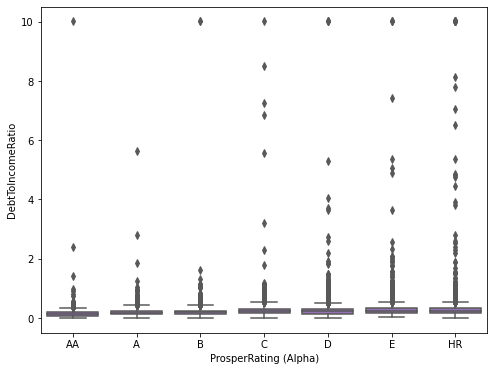

In [77]:
plt.figure(figsize = [8,6])
sns.boxplot(data= loan_subdata,x='ProsperRating (Alpha)', y = 'DebtToIncomeRatio',color= default_color);

It is interesting to note the outliers for each ProsperRating. For safe borrowers, that is AA, A, and B, the outliers are not so prominent unlike their risky counterparts. For example, the risky borrowers have their outliers quite evenly spreadout. Moreover, we do not see much variation in the DebtToIncomeRatio across different values of ProsperRating. So, we can say that DebtToIncomeRatio does not have any such major impact on ProsperRating.

LoanStatus vs. ProsperRating

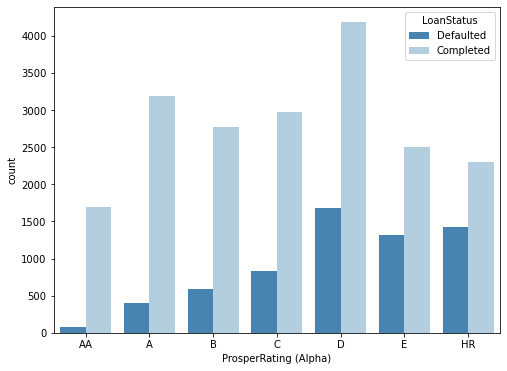

In [78]:
plt.figure(figsize = [8,6])
sns.countplot(data=loan_subdata, x='ProsperRating (Alpha)', hue='LoanStatus', palette='Blues_r');

Now, as seen in the plot, interstingly, only a few borrowers  have defaulted loans with Prosper Rating of AA. The proportion of defaulted  loans in the lower rating groups are significant higher. For example, in the  ‘HR’ group the defaulted loan is more than half of the completed loans.



 Let's see how loan status and investors are related.

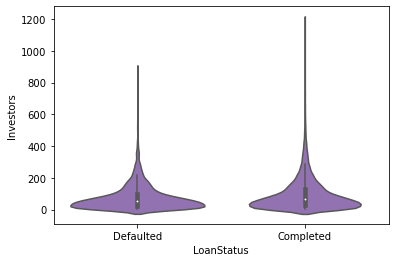

In [79]:
sns.violinplot(data = loan_subdata, x = 'LoanStatus', y = 'Investors', color = default_color);

Defaulted credits usually have fewer investors. Next let’s see connection between employment status and loan status.

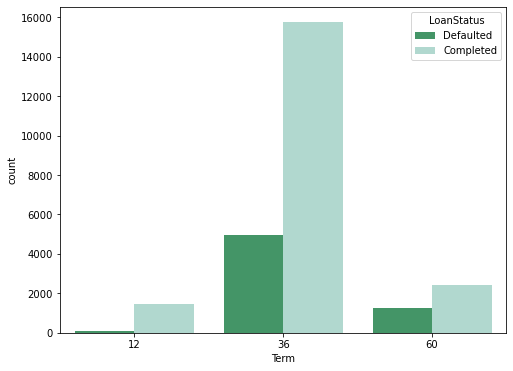

In [80]:
plt.figure(figsize = [8,6])
sns.countplot(data=loan_subdata, x='Term', hue='LoanStatus', palette='BuGn_r');

The proportion of defaulted credits is highest among loans with Term of 60 months.

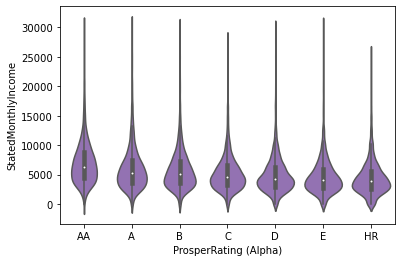

In [81]:
sns.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = default_color);

As expected, individuals with higher monthly income tend to have higher rating. 

Now let's move unto figuring variables that influence Prosper rating of the client.

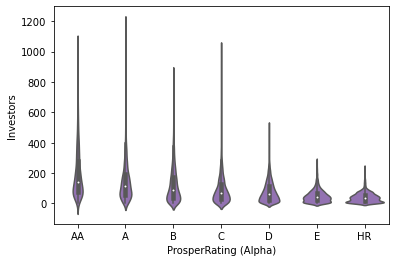

In [82]:
sns.violinplot(data = loan_subdata, x='ProsperRating (Alpha)', y='Investors', color = default_color);

We can observe that Borrowers with higher ratings such as AA and A on average have more investors. 

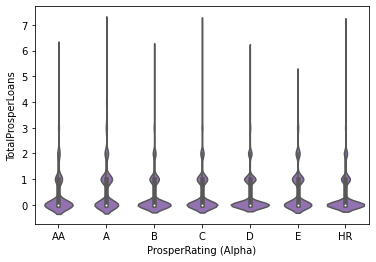

In [83]:
sns.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'TotalProsperLoans', color = default_color);

So, from the above plot, there is no such relationship between Prosper Rating and TotalProsperLoans as the values are almost similar for all the Prosper Ratings.

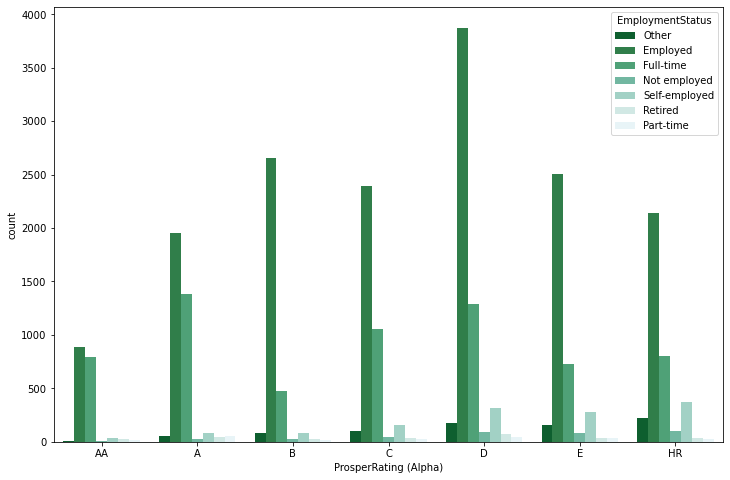

In [84]:
plt.figure(figsize = [12, 8])
sns.countplot(data = loan_subdata, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='BuGn_r');

Lower ratings such as HR, E and D seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time than the higher ratings.

<Figure size 720x720 with 0 Axes>

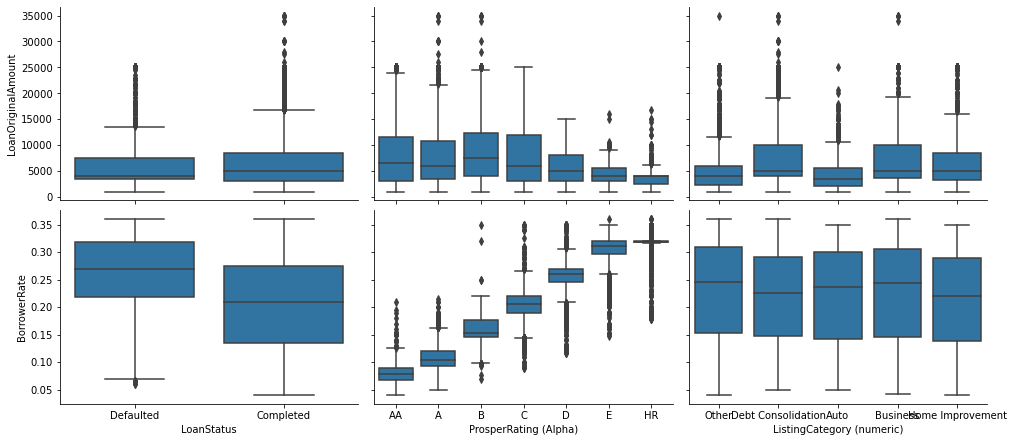

In [85]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate']
categoric_vars = ['LoanStatus','ProsperRating (Alpha)', 'ListingCategory (numeric)']


def boxgrid(x, y, **kwargs):
    sns.boxplot(x, y, color = sns.color_palette()[0])

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_subdata, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
plt.show();


Borrower Rate for defaulted loans is considerably higher than for the completed but this is due to clients with lower rating get higher interest rate.Borrowers with lower rating in general receive lower loan amount and higher interest rate. Amounts borrowed for 'other' and 'auto' purposes are usually lower than other categories, the rate does not fluctuate much between various purposes of loans. Defaulted loans tend to be somewhat smaller than Completed. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected default credits tend to be given to individuals with lower rating. Business and home improvement seems to be riskier categories. The borrower rate tends to be higher for defaulted credits. Long term (60 months) credits are riskier than short term (12 months). Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

One interesting thing I've observed is that prosper rating D is the most frequent rating among defaulted credits.

### Multivariate Exploration

Next let's check on categorical variables, first let's see relationships between rating, loan amount and loan status:

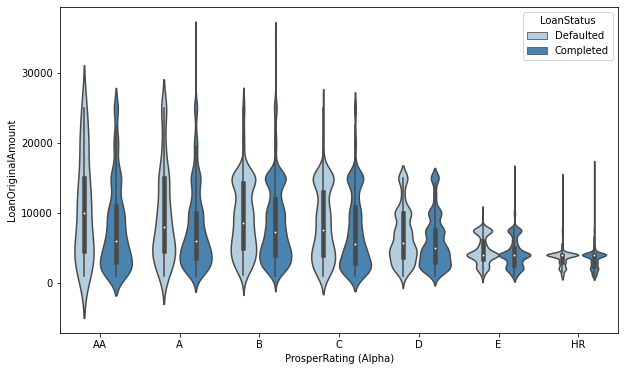

In [86]:
plt.figure(figsize = [10, 6])
sns.violinplot(data=loan_subdata, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette = 'Blues');


Except for the lowest ratings defaulted credits tend to be larger than completed. At first glance this is at odds with what we've figured in previous section (defaulted credits tend to be smaller than completed), but most of the defaulted credits comes from individuals with low Prosper rating (they tend to borrow less) and this drives average amount of defaulted credit down.

Let's check how amount, listing category loan and loan status interact:

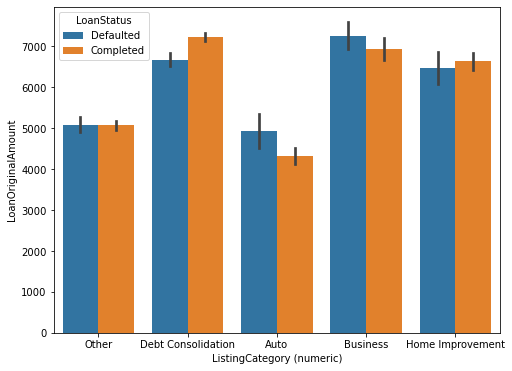

In [87]:
plt.figure(figsize = [8,6])
sns.barplot(data=loan_subdata, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');


As we've found before Auto and Business categories are somewhat more prone to the defaulting and now we can see that business category tend to have larger amount. Let's have closer look at relationships between credit category, credit rating and outcome of credit.

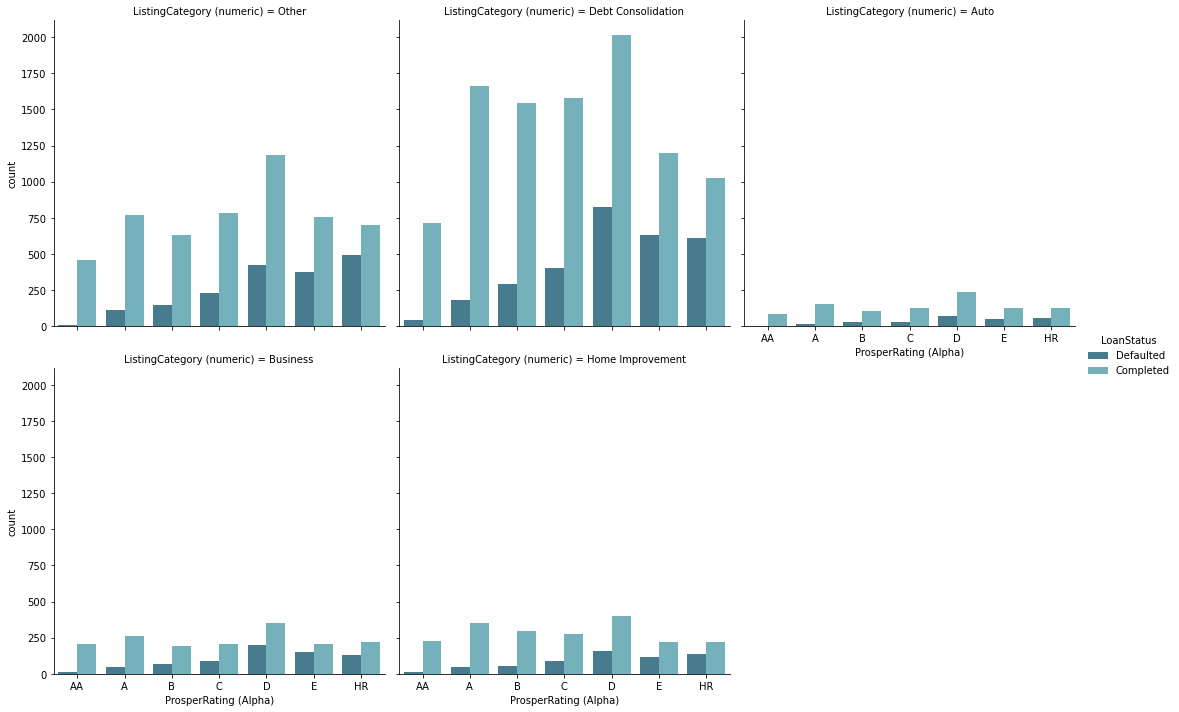

In [88]:
sns.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

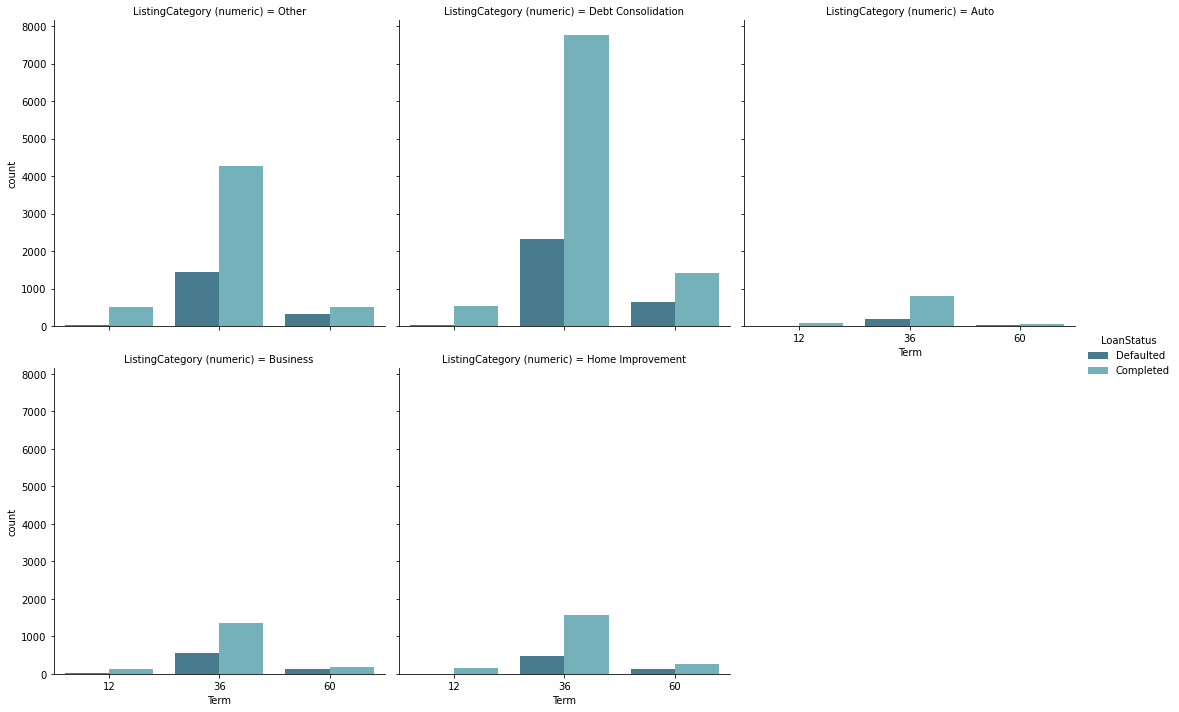

In [89]:
sns.catplot(x='Term', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

We can see that long-term credits are especially risky for purposes Other, Business and Home Improvement. Next let's see relationship between Term, Rating and outcome of credit:

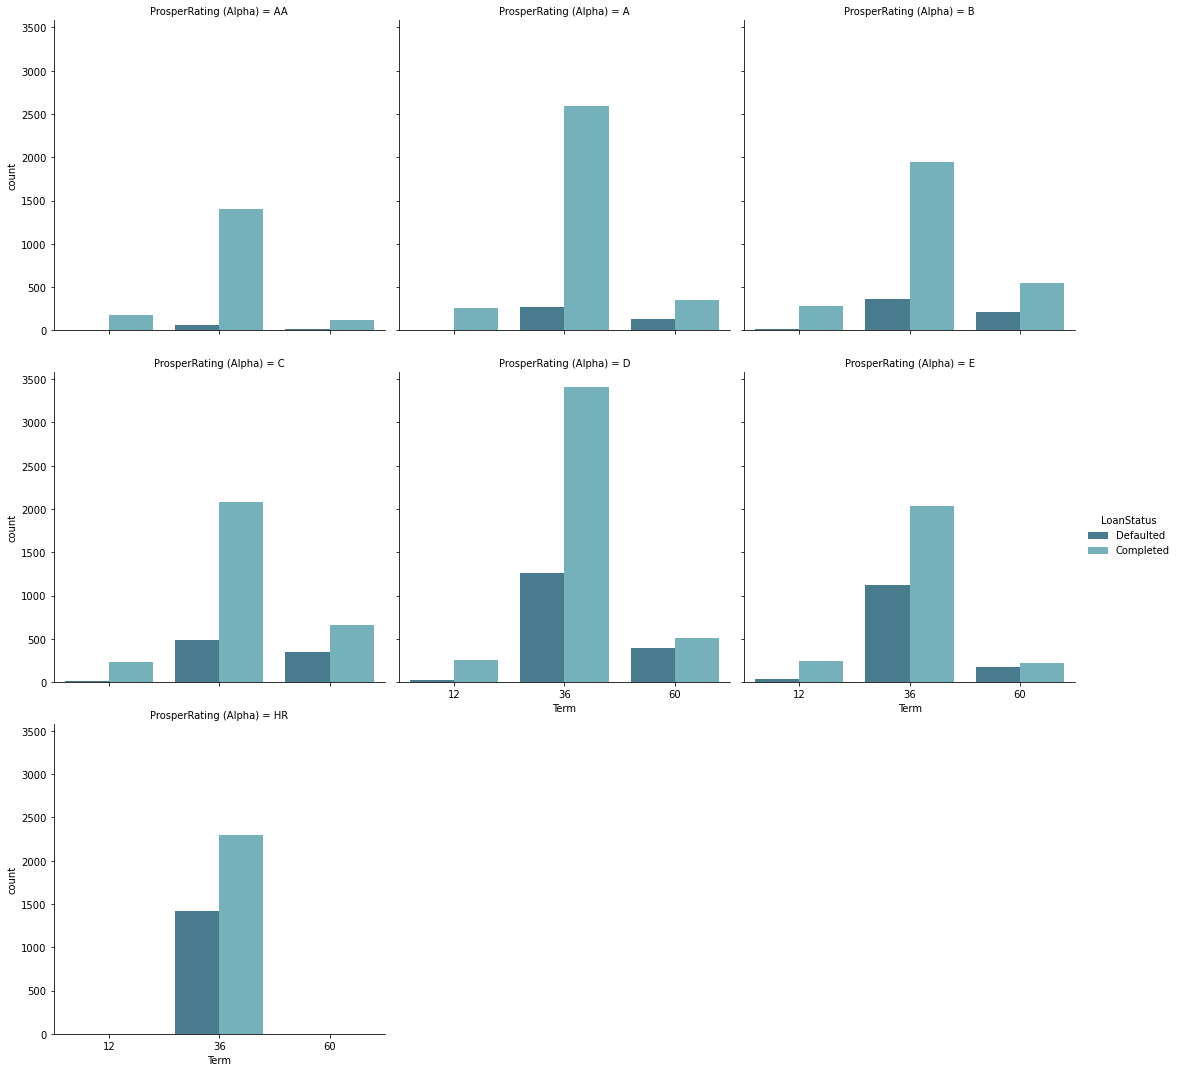

In [90]:
sns.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );


Long term (60 months) credit seems to be riskier than mid-term (36 months) or short-term (12 months). Interestingly enough there is no short-term or long-term credits for the lowest credit rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Our initial stated intuition was indeed strengthened. The outcome of credit depends on Prosper rating, Term, Employment status.  Also, Long term (60 months) loans are riskier than mid-term and short term loans. The Auto and Business categories are somewhat more prone to the defaulting and the business category tends to have higher amount loans as well. Borrowers with high Prosper rating tend to borrow more and the ones with low rating on the other hand tend to borrow less. Also, among the high rating borrowers, the defaulted loan amount is higher than the completed, whereas among the low rating borrowers, defaulted credits usually are almost equal as completed.

### Were there any interesting or surprising interactions between features?

It is interesting to note that DebtToIncomeRatio does not affect ProsperRating significantly.But, we can’t be so confident for putting up this conclusion, as our results are based on this small dataset, hence, might not reflect the true figures.Also,  borrowers with lowerst rating (HR) have only mid-term (36 months) credits.